# IA PARA CIENCIA DE DATOS

## Contenido

1. Packaging
1. Read file and load data
1. ML methods
1. Metrics

## 1. Packaging

In [1]:
# Core libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)

# Matplotlib and seaborn for charting
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot

In [2]:
# sklearn for ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.neural_network import MLPRegressor

# Sklearn regression model evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [3]:
# Custom analysis modules
from analysis_modules import *

## 2. Read file and load data

### 2.1 Read file

In [4]:
# Load data
data_file = "BMW sales data (2010-2024.csv"
datos = pd.read_csv(data_file, header=0)

In [5]:
# View data information
describeData(datos)

      Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non

In [ ]:
newDataset = datos[datos['Region'] == 'North America']
print(newDataset)

### 2.2 Preprocessing

In [6]:
# Preprocess data
misDatos = procesarDatos(datos)
print(misDatos.head())
print()

       Year  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume  Transmission  \
0  0.428571       0.571429    0.758752   0.763795      0.828367           0.0   
1  0.214286       0.028571    0.608361   0.546890      0.336196           1.0   
2  0.857143       0.857143    0.054942   0.925187      0.696434           1.0   
3  1.000000       0.057143    0.136265   0.344130      0.398727           1.0   
4  0.714286       0.171429    0.610661   0.221094      0.301041           0.0   

   Fuel_Type  
0   0.000000  
1   0.333333  
2   0.000000  
3   0.000000  
4   0.666667  



### 2.3 Correlation analysis

                 CORRELATION ANALYSIS
----------------------------------------------------------
                   Year  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume  \
Year           1.000000      -0.001944    0.008741   0.003547      0.001671   
Engine_Size_L -0.001944       1.000000   -0.004906   0.000146     -0.003942   
Mileage_KM     0.008741      -0.004906    1.000000  -0.004238      0.001434   
Price_USD      0.003547       0.000146   -0.004238   1.000000      0.000080   
Sales_Volume   0.001671      -0.003942    0.001434   0.000080      1.000000   
Transmission  -0.005116      -0.001357    0.013476   0.005230      0.001487   
Fuel_Type     -0.000393      -0.006574    0.006080   0.004910      0.002588   

               Transmission  Fuel_Type  
Year              -0.005116  -0.000393  
Engine_Size_L     -0.001357  -0.006574  
Mileage_KM         0.013476   0.006080  
Price_USD          0.005230   0.004910  
Sales_Volume       0.001487   0.002588  
Transmission       1.000

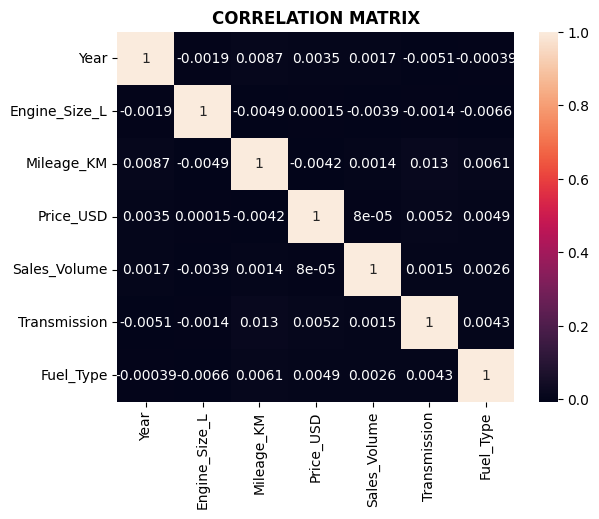

In [7]:
# compute correlation
computeCorr(misDatos)

### 2.4 Split Data

In [8]:
# --------------------
# split data
def splitDataSet(dataSet=0, test_size=.2, randSplit=True):
    """
    Split data in train and test sets
    """

    train, test = train_test_split(dataSet, test_size=test_size, shuffle=randSplit, random_state=0)

    return [train, test]

In [132]:
# Split data into training and test sets
ts_size = .3
[trainSet, testSet] = splitDataSet(misDatos, test_size=ts_size, randSplit=True)
print("Train set")
print(trainSet.head())
print()
print('trainSet shape: ', trainSet.shape)
print()

print("Test set")
print(testSet.head())
print()
print('testSet shape: ', testSet.shape)
print()

Train set
           Year  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume  \
17967  0.642857       0.171429    0.891541   0.034523      0.423881   
32391  0.214286       0.000000    0.643863   0.587546      0.529245   
9341   0.928571       0.571429    0.973364   0.489266      0.921406   
7929   0.785714       0.942857    0.096698   0.524478      0.722901   
46544  0.500000       0.742857    0.712880   0.484533      0.717244   

       Transmission  Fuel_Type  
17967           0.0   0.000000  
32391           1.0   0.000000  
9341            1.0   0.666667  
7929            0.0   0.333333  
46544           1.0   0.000000  

trainSet shape:  (35000, 7)

Test set
           Year  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume  \
11841  0.500000       0.314286    0.541354   0.876853      0.859279   
19602  0.857143       0.542857    0.393039   0.746294      0.506718   
45519  0.857143       0.457143    0.410474   0.389009      0.453379   
25747  0.928571       0.942857    0.880066

## 3. ML methods

In [ ]:
# Create dataframes for training and test sets
# with the target variables only
yVar = 'Price_USD'
xVar = list(misDatos.columns)
xVar.remove(yVar)
xVar = ['Year', 'Mileage_km']
print("xVar: ", xVar)
print("yVar: ", yVar)
print()

trainModel = pd.DataFrame()
testModel = pd.DataFrame()
trainModel[yVar] = trainSet[yVar]
testModel[yVar] = testSet[yVar]
print(trainModel.head())
print()
print(testModel.head())

xVar:  ['Fuel_Type']
yVar:  Price_USD

       Price_USD
17967   0.034523
32391   0.587546
9341    0.489266
7929    0.524478
46544   0.484533

       Price_USD
11841   0.876853
19602   0.746294
45519   0.389009
25747   0.949532
42642   0.913576


In [107]:
model_name = 'DT'
columnsName = [model_name + ' ' + yVar]
print("columnsName: ", columnsName)

columnsName:  ['DT Price_USD']


In [173]:
# Perform regression with DT
classifier_dt = DecisionTreeRegressor(max_depth=50,random_state=0)
classifier_dt.fit(trainSet[xVar], trainSet[yVar])
print("Estimated Parameters:")
print(f"Max depth of trees (max_depth): {classifier_dt.get_depth()}")
print(f"Number of leaves (n_leaves): {classifier_dt.get_n_leaves()}")
print("\n")

trainModel['DT Price_USD'] =classifier_dt.predict(trainSet[xVar])
print(trainModel)
print()
testModel['DT Price_USD'] = classifier_dt.predict(testSet[xVar])
print(testModel)


Estimated Parameters:
Max depth of trees (max_depth): 3
Number of leaves (n_leaves): 4


       Price_USD  DT Price_USD
17967   0.034523      0.499143
32391   0.587546      0.499143
9341    0.489266      0.497056
7929    0.524478      0.498623
46544   0.484533      0.499143
...          ...           ...
21243   0.645470      0.499143
45891   0.513356      0.501826
42613   0.829518      0.497056
43567   0.500322      0.497056
2732    0.304673      0.498623

[35000 rows x 2 columns]

       Price_USD  DT Price_USD
11841   0.876853      0.497056
19602   0.746294      0.499143
45519   0.389009      0.501826
25747   0.949532      0.499143
42642   0.913576      0.501826
...          ...           ...
38344   0.451277      0.501826
49984   0.016889      0.497056
32624   0.795884      0.497056
46437   0.105613      0.498623
35070   0.426909      0.501826

[15000 rows x 2 columns]


In [75]:
# Perform regression with RF
classifier_rf = RandomForestRegressor(random_state=0)
classifier_rf.fit(trainSet[xVar], trainSet[yVar])

trainModel['RF Price_USD'] = classifier_rf.predict(trainSet[xVar])
print(trainModel)
print()
testModel['RF Price_USD'] = classifier_rf.predict(testSet[xVar])
print(testModel)

       Price_USD  DT Price_USD  RF Price_USD
39758   0.154348      0.154348      0.298183
18457   0.363441      0.363441      0.412468
33239   0.957510      0.957510      0.842818
35006   0.092924      0.092924      0.207213
30982   0.041479      0.041479      0.134484
...          ...           ...           ...
21243   0.645470      0.645470      0.586971
45891   0.513356      0.513356      0.546953
42613   0.829518      0.829518      0.668837
43567   0.500322      0.500322      0.527456
2732    0.304673      0.304673      0.379246

[37500 rows x 3 columns]

       Price_USD  DT Price_USD  RF Price_USD
11841   0.876853      0.569390      0.557819
19602   0.746294      0.323185      0.553544
45519   0.389009      0.132736      0.492935
25747   0.949532      0.373242      0.501522
42642   0.913576      0.053368      0.431745
...          ...           ...           ...
15070   0.185737      0.845574      0.526625
7477    0.797884      0.067646      0.560621
40648   0.937310      0.2255

In [65]:
# Perform regression with SVM
classifier_svm = svm.SVR()
classifier_svm.fit(trainSet[xVar], trainSet[yVar])

trainModel['SVM Price_USD'] = classifier_svm.predict(trainSet[xVar])
print(trainModel)
print()
testModel['SVM Price_USD'] = classifier_svm.predict(testSet[xVar])
print(testModel)


       Price_USD  DT Price_USD  RF Price_USD  SVM Price_USD
39758   0.154348      0.154348      0.298183       0.514466
18457   0.363441      0.363441      0.412468       0.498718
33239   0.957510      0.957510      0.842818       0.527710
35006   0.092924      0.092924      0.207213       0.446339
30982   0.041479      0.041479      0.134484       0.501706
...          ...           ...           ...            ...
21243   0.645470      0.645470      0.586971       0.535172
45891   0.513356      0.513356      0.546953       0.481763
42613   0.829518      0.829518      0.668837       0.438922
43567   0.500322      0.500322      0.527456       0.464446
2732    0.304673      0.304673      0.379246       0.513878

[37500 rows x 4 columns]

       Price_USD  DT Price_USD  RF Price_USD  SVM Price_USD
11841   0.876853      0.569390      0.557819       0.517995
19602   0.746294      0.323185      0.553544       0.510055
45519   0.389009      0.132736      0.492935       0.519298
25747   0.949

In [67]:
# Perform regression with MLP
classifier_mlp = MLPRegressor(hidden_layer_sizes=(100,50), solver='sgd', max_iter=400, random_state=0)
classifier_mlp.fit(trainSet[xVar], trainSet[yVar])

trainModel['MLP Price_USD'] = classifier_mlp.predict(trainSet[xVar])
print(trainModel)
print()
testModel['MLP Price_USD'] = classifier_mlp.predict(testSet[xVar])
print(testModel)

       Price_USD  DT Price_USD  RF Price_USD  SVM Price_USD  MLP Price_USD
39758   0.154348      0.154348      0.298183       0.514466       0.514818
18457   0.363441      0.363441      0.412468       0.498718       0.501272
33239   0.957510      0.957510      0.842818       0.527710       0.513328
35006   0.092924      0.092924      0.207213       0.446339       0.540434
30982   0.041479      0.041479      0.134484       0.501706       0.475726
...          ...           ...           ...            ...            ...
21243   0.645470      0.645470      0.586971       0.535172       0.494854
45891   0.513356      0.513356      0.546953       0.481763       0.505839
42613   0.829518      0.829518      0.668837       0.438922       0.486159
43567   0.500322      0.500322      0.527456       0.464446       0.461648
2732    0.304673      0.304673      0.379246       0.513878       0.491775

[37500 rows x 5 columns]

       Price_USD  DT Price_USD  RF Price_USD  SVM Price_USD  MLP Price_US

## 4. Metrics

In [174]:
# Create dataframes to store model performance metrics
methodsUsed=['DT', 'RF', 'SVM', 'MLP']
performanceHeaders=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2']
trainModelMetrics = pd.DataFrame(index=methodsUsed, columns=performanceHeaders)
testModelMetrics = pd.DataFrame(index=methodsUsed, columns=performanceHeaders)

In [79]:
def calculateMetrics(model_name, position, yVar, trainModel, testModel, trainModelMetrics, testModelMetrics):
    columnsNames = [model_name + ' Price_USD']

    # --- Train Metrics ---
    trainModelMetrics.iloc[position, 0] = round(mean_absolute_error(trainModel[yVar], trainModel[columnsNames]), 2)
    trainModelMetrics.iloc[position, 1] = round(mean_squared_error(trainModel[yVar], trainModel[columnsNames]), 2)
    trainModelMetrics.iloc[position, 2] = round(np.sqrt(trainModelMetrics.iloc[position, 1]), 2)
    trainModelMetrics.iloc[position, 3] = round(mean_absolute_percentage_error(trainModel[yVar], trainModel[columnsNames]), 2)
    trainModelMetrics.iloc[position, 4] = round(r2_score(trainModel[yVar], trainModel[columnsNames]), 2)

    # --- Test Metrics ---
    testModelMetrics.iloc[position, 0] = round(mean_absolute_error(testModel[yVar], testModel[columnsNames]), 2)
    testModelMetrics.iloc[position, 1] = round(mean_squared_error(testModel[yVar], testModel[columnsNames]), 2)
    testModelMetrics.iloc[position, 2] = round(np.sqrt(testModelMetrics.iloc[position, 1]), 2)
    testModelMetrics.iloc[position, 3] = round(mean_absolute_percentage_error(testModel[yVar], testModel[columnsNames]), 2)
    testModelMetrics.iloc[position, 4] = round(r2_score(testModel[yVar], testModel[columnsNames]), 2)

    return trainModelMetrics, testModelMetrics

In [175]:
# DT metrics
model_name = 'DT'
position = 0  # Position for DT in the results DataFrame
trainModelMetrics, testModelMetrics = calculateMetrics(model_name, position, yVar, trainModel, testModel, trainModelMetrics, testModelMetrics)

# RF metrics
model_name = 'RF'
position = 1  # Position for RF in the results DataFrame
#trainModelMetrics, testModelMetrics = calculateMetrics(model_name, position, yVar, trainModel, testModel, trainModelMetrics, testModelMetrics)

# SVM metrics
model_name = 'SVM'
position = 2  # Position for SVM in the results DataFrame
#trainModelMetrics, testModelMetrics = calculateMetrics(model_name, position, yVar, trainModel, testModel, trainModelMetrics, testModelMetrics)

# MLP metrics
model_name = 'MLP'
position = 3  # Position for MLP in the results DataFrame
#trainModelMetrics, testModelMetrics = calculateMetrics(model_name, position, yVar, trainModel, testModel, trainModelMetrics, testModelMetrics)

In [176]:
print("=======================================================================")
print("                      MODEL PERFORMANCE COMPARISON")
print("-----------------------------------------------------------------------")
print("                      Training")
print("-----------------------------------------------------------------------")
print(trainModelMetrics)
print("-----------------------------------------------------------------------")
print("                      Testing")
print("-----------------------------------------------------------------------")
print(testModelMetrics)
print("\n")

                      MODEL PERFORMANCE COMPARISON
-----------------------------------------------------------------------
                      Training
-----------------------------------------------------------------------
      MAE   MSE  RMSE                MAPE   R2
DT   0.25  0.08  0.28  64572081534.900002  0.0
RF    NaN   NaN   NaN                 NaN  NaN
SVM   NaN   NaN   NaN                 NaN  NaN
MLP   NaN   NaN   NaN                 NaN  NaN
-----------------------------------------------------------------------
                      Testing
-----------------------------------------------------------------------
      MAE   MSE  RMSE  MAPE   R2
DT   0.25  0.08  0.28  5.78 -0.0
RF    NaN   NaN   NaN   NaN  NaN
SVM   NaN   NaN   NaN   NaN  NaN
MLP   NaN   NaN   NaN   NaN  NaN


